In [23]:

import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations,product
import random
import math
import heapq
from matplotlib.patches import FancyArrowPatch
plt.rcParams['animation.embed_limit'] = 50
import warnings
warnings.filterwarnings('ignore')

## HEX Game
HEX is a board gam played on a hexagonal grid. Two players aim to create an unbroken chain of their pieces from one side of the board to the other. Gale's algorithm provides a proof of the fact that there is exactly one player in HEX.

### HEX Theorem

In any game of HEX of size nxn there is exactly one winner.

### Gale's proof
The theorem consists of two claims:
### Claim 1: There is at least one winner
Gale gave a proof of this fact along the following lines. Consider the honeycomb graph associated to a filled HEX board 
where the vertices are the corners of the grid and the edges are the sides of the hexagons. Suppose the whole board is colored.
From the honeycomb graph delete all sides which separate hexagons of the same color. In the resulting graph all nodes have degree
one or two. This implies that they are either lines or cicles. The connected component that starts at the vertex separating
the red and blue sides cannot be a cicle. Thus, it has to be a line that goes to another such vertex. Moreover, the color of the
hexacons to either side of that path are constant and oposite. This gives winning path.


### Claim 2: There cannot be two winners
This is a consequence of the fact that the complete graph in 5 vertices is not planar, which can be 
proved using Euler's formula.


In [22]:
def draw_rhombus_hex_board(n,radius=1):
    """
    Draw an n x n Hex board in a rhombus shape with hexagons tightly positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,10)
    ax.set_aspect('equal')
    ax.set_facecolor('gray')
    fig.set_facecolor("teal")

    # Define the radius of the hexagons to fit tightly
    
    dx=math.sqrt(3)/2
    dy=3/2
    
    # Calculate the coordinates for each hexagon in a rhombus-shaped layout
    for x in range(n):
        for y in range(n):

            hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                              numVertices=6, 
                                              radius=1, 
                                              orientation=np.radians(60), 
                                              edgecolor="none", 
                                              facecolor=random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)
    for x in range(n):
        for y in [-1,n]:
            hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                                numVertices=6, 
                                                radius=1, 
                                                orientation=np.radians(60), 
                                                edgecolor="none", 
                                                facecolor="deeppink")#random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)
            hexagon = patches.RegularPolygon(((x +y) *dx, (x - y ) * dy), 
                                                numVertices=6, 
                                                radius=1, 
                                                orientation=np.radians(60), 
                                                edgecolor="none", 
                                                facecolor="cornsilk")#random.choice(["deeppink","cornsilk"]))
            ax.add_patch(hexagon)

    # Set the limits of the plot
    ax.set_xlim([-n*radius/2, 2*n * radius])
    ax.set_ylim([-1.8*n*radius, 1.8*n* radius])
    ax.set_axis_off()



# Draw a Hex board of size 5x5 in a rhombus shape without gaps
#


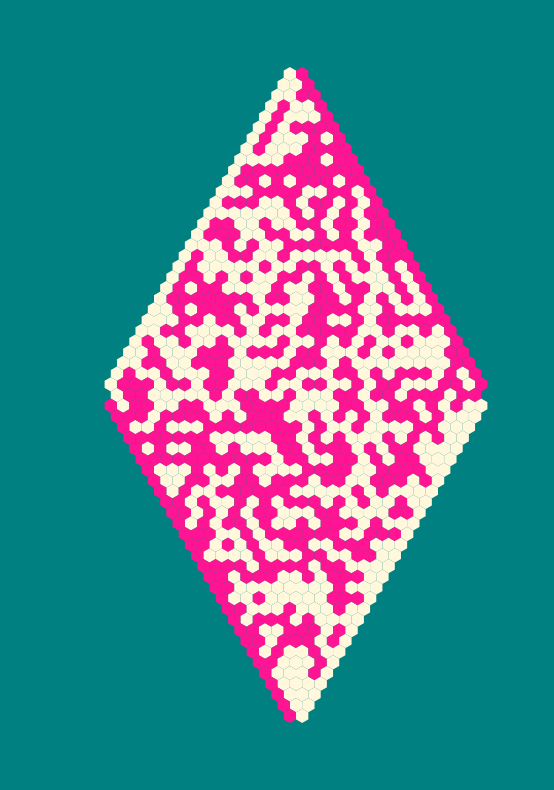

In [49]:
draw_rhombus_hex_board(30)

In [50]:
def draw_rhombus_hex_board(n,radius=1):
    """
    Draw an n x n Hex board in a rhombus shape with hexagons tightly positioned next to each other.
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,10)
    ax.set_aspect('equal')
    ax.set_facecolor('gray')
    fig.set_facecolor("cornsilk")
    colors=["#0B3954","deeppink"]
    # Define the radius of the hexagons to fit tightly
    
    dx=math.sqrt(3)/2
    dy=3/2
    centers=[(x,y) for (x,y) in product(list(range(n)),list(range(n)))]
    center_color=dict()
    for (x,y) in centers:
        center_color[(x,y)]=random.choice(colors)
    # Calculate the coordinates for each hexagon in a rhombus-shaped layout
    for (x,y) in centers:
        hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                            numVertices=6, 
                                            radius=1, 
                                            orientation=np.radians(60), 
                                            edgecolor="none", 
                                            facecolor=random.choice(["deeppink","cornsilk"]))
        ax.add_patch(hexagon)
    for x in range(n):
        for y in [-1,n]:
            centers.append((x,y))
            centers.append((y,x))
            center_color[(x,y)]=colors[1]
            center_color[(y,x)]=colors[0]
    # center_color[(3,3)]="yellow"
    # center_color[(3,4)]="green"
    # center_color[(4,4)]="blue"
    # center_color[(2,3)]="red"
    for (x,y) in centers:
        hexagon = patches.RegularPolygon(((x +y) *dx, (y - x ) * dy), 
                                            numVertices=6, 
                                            radius=1, 
                                            orientation=np.radians(60), 
                                            edgecolor="none", 
                                            facecolor=center_color[(x,y)])#random.choice(["deeppink","cornsilk"]))
        ax.add_patch(hexagon)
            
    edges =[]
    for (u,v) in centers:
        if (u,v+1) in centers:
            edges.append(((u,v),(u,v+1)))
        if (u+1,v+1) in centers:
            edges.append(((u,v),(u+1,v+1)))
        if (u-1,v) in centers:
            edges.append(((u,v),(u-1,v)))
    for ((u,v),(x,y)) in edges:
        if center_color[(u,v)]!=center_color[(x,y)]:
            u,v=(u+v)*dx,(v-u)*dy
            x,y=(x+y)*dx,(y-x)*dy
            m=((u+x)/2,(v+y)/2)
            v=((x-u)/2,(y-v)/2)
            v=(v[1]/math.sqrt(3),-v[0]/math.sqrt(3))
            p=(m[0]+v[0],m[1]+v[1])
            q=(m[0]-v[0],m[1]-v[1])
            ax.plot([p[0], q[0]], [p[1], q[1]], marker="none",color='cornsilk')
    # Set the limits of the plot
    ax.set_xlim([-n*radius/2, 2*n * radius])
    ax.set_ylim([-1.8*n*radius, 1.8*n* radius])
    ax.set_axis_off()


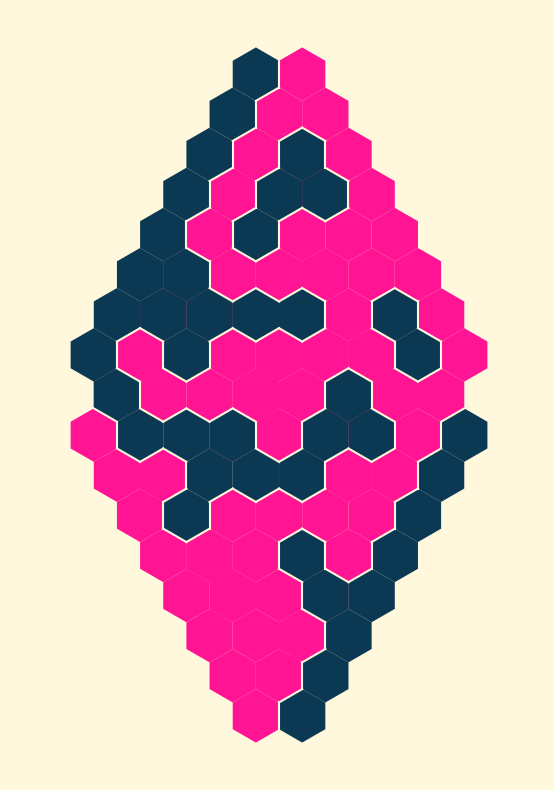

In [84]:
draw_rhombus_hex_board(8)